In [1]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

In [2]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index)+1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [3]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = model[word] if word in model else np.zeros(embedding_dim)

    return embedding_matrix

In [4]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [5]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [6]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [7]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_matrix), padding_idx=0)
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

Epoch: 15/15
Validation Loss: 0.1731
Validation Macro F1: 0.3277
Training Macro F1: 0.3263


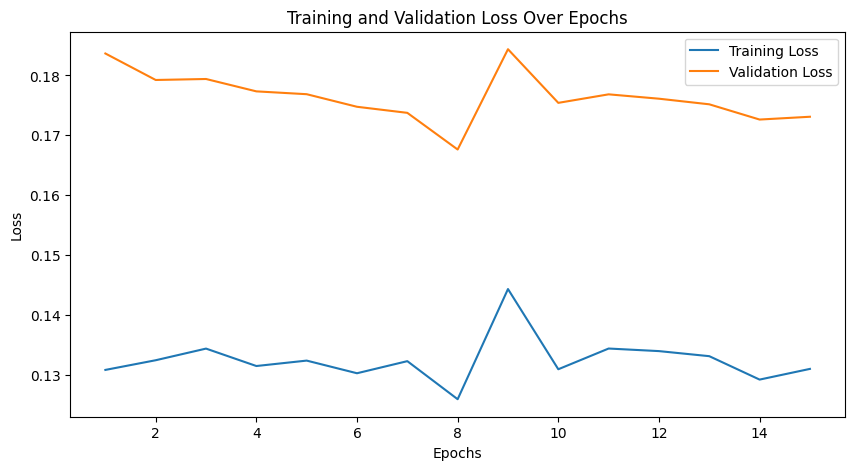

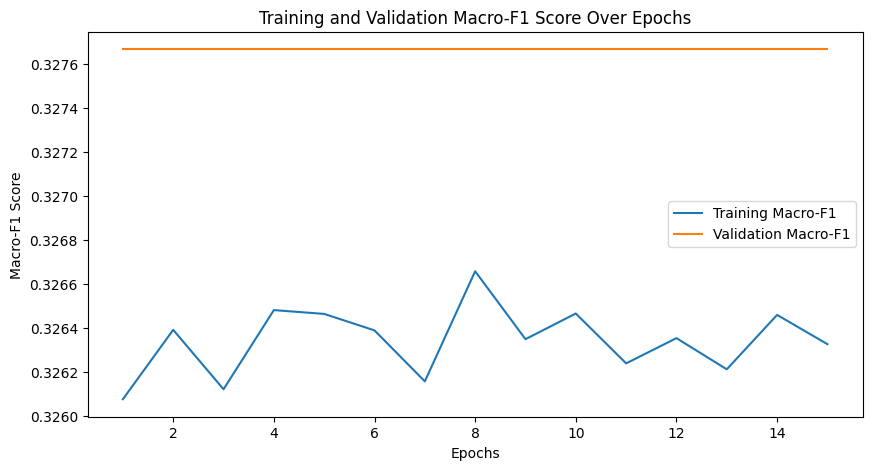

Final Test Accuracy: 0.9544
Final Test Macro F1: 0.3256
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.95      1.00      0.98     14774
           B       0.00      0.00      0.00       463
           I       0.00      0.00      0.00       243

    accuracy                           0.95     15480
   macro avg       0.32      0.33      0.33     15480
weighted avg       0.91      0.95      0.93     15480



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Rnn, "rnn_glove_300",15)

Epoch: 15/15
Validation Loss: 0.0770
Validation Macro F1: 0.6665
Training Macro F1: 0.7132


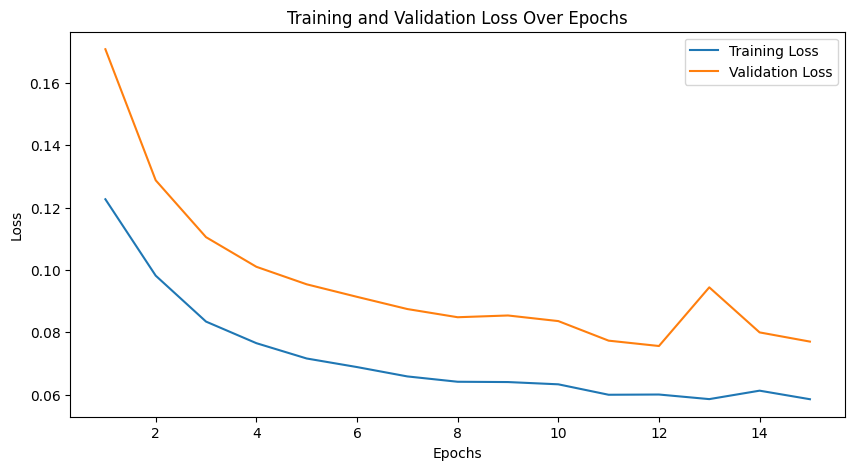

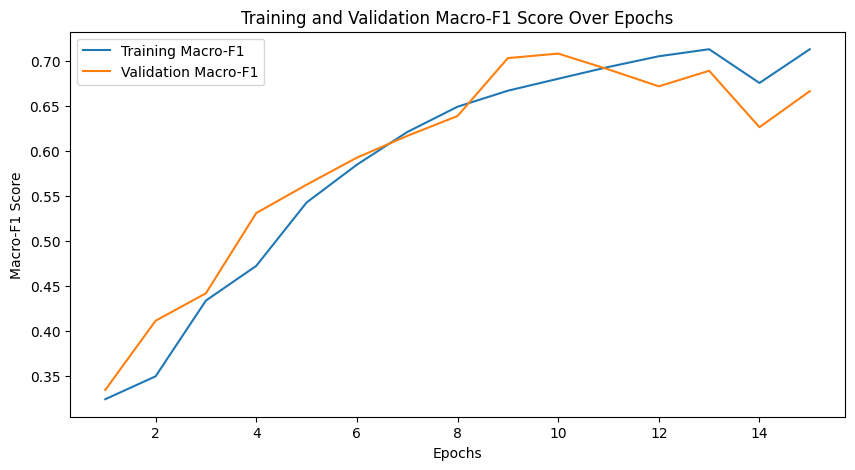

Final Test Accuracy: 0.9662
Final Test Macro F1: 0.6266
Classification Report for Test Data:
               precision    recall  f1-score   support

           O       0.97      1.00      0.98     14774
           B       0.75      0.36      0.49       463
           I       0.81      0.27      0.41       243

    accuracy                           0.97     15480
   macro avg       0.85      0.54      0.63     15480
weighted avg       0.96      0.97      0.96     15480



In [9]:
run(load_glove_embeddings, 100, "../word_embeddings/glove.6B.100d.txt", Rnn, "rnn_glove_100", 15)

In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Rnn, "rnn_word2vec",15)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Rnn, "rnn_fasttext",15)

In [ ]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Lstm, "lstm_glove",15)

In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Lstm, "lstm_word2vec",15)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Lstm, "lstm_fasttext",15)

In [ ]:
run(load_glove_embeddings, 300, "../word_embeddings/glove.6B.300d.txt", Gru, "gru_glove",15)

In [ ]:
run(load_word2vec_embeddings, 300, "../word_embeddings/GoogleNews-vectors-negative300.bin", Gru, "gru_word2vec", 15)

In [ ]:
run(load_fasttext_embeddings, 300, "../word_embeddings/wiki-news-300d-1M.vec", Gru, "gru_fasttext",15)